In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import scipy.stats as stats

import statsmodels.api as sm
%matplotlib inline 

5.	Using the pandas `read_csv()` function, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. 
    * Take a look at the first 10 rows. 
    * Look at the last 5 rows. Do you see a problem?
    * Redo the read_csv() call to correct this issue - **do not** modify the original csv file.

In [118]:
gdp_df=pd.read_csv("../data/gdp_per_capita.csv", skipfooter=2) 
gdp_df.head(n=10)

<ipython-input-118-0785479650ca>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  gdp_df=pd.read_csv("../data/gdp_per_capita.csv", skipfooter=2)


,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN
5,Afghanistan,2013,1807.762344,NaN
6,Afghanistan,2012,1772.764974,NaN
7,Afghanistan,2011,1626.764793,NaN
8,Afghanistan,2010,1671.581238,NaN
9,Afghanistan,2009,1502.354073,NaN


In [3]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6729 entries, 0 to 6728
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6729 non-null   object 
 1   Year             6729 non-null   int64  
 2   Value            6729 non-null   float64
 3   Value Footnotes  1 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 210.4+ KB


6. Drop the 'Value Footnotes' column, and rename the remaining columns to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

In [119]:
gdp_df.drop(["Value Footnotes"], axis=1, inplace=True)
gdp_df.shape

(6729, 3)

In [122]:
gdp_df.rename(columns={"Country or Area":"Country", "Value":"GDP_Per_Capita"}, inplace=True)

7. How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

In [123]:
gdp_df.shape

(6729, 3)

- It has rows=6731 and column=3
- column 'year' should be in date format. also we need to remove extra footnote rows to convert Year inte date format.

- year reprsented from 1990-2018

In [124]:
gdp_df.dtypes

Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object

In [8]:
gdp_df.describe(include='all')


,Country,Year,GDP_Per_Capita
count,6729,6729.000000,6729.000000
unique,243,NaN,NaN
top,France,NaN,NaN
freq,29,NaN,NaN
mean,NaN,2004.293357,15468.017091
std,NaN,8.269834,17995.866104
min,NaN,1990.000000,438.643111
25%,NaN,1997.000000,3170.407545
50%,NaN,2004.000000,8959.240204
75%,NaN,2011.000000,20940.081023


8. Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?

The data point increased  over time

In [9]:
gdp_df["Year"].value_counts()

2011    243
2012    241
2009    241
2010    241
2013    241
2015    240
2008    240
2014    240
2007    239
2016    239
2017    239
2005    238
2004    238
2002    238
2006    238
2003    238
2001    237
2000    236
1999    228
1998    227
2018    226
1997    226
1996    224
1995    224
1994    218
1993    215
1992    213
1991    211
1990    210
Name: Year, dtype: int64

9. How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?

there are 243 countries. Djibouti has less data years 

In [125]:
gdp_df["Country"].value_counts()

France                       29
Gabon                        29
Senegal                      29
The Gambia                   29
El Salvador                  29
                             ..
Nauru                        12
Sint Maarten (Dutch part)     9
South Sudan                   8
Turks and Caicos Islands      8
Djibouti                      1
Name: Country, Length: 243, dtype: int64

10. Create a new dataframe by subsetting `gdp_df` to just the year 2014. Call this new dataframe `gdp_2014`.

In [10]:
gdp_2014=gdp_df[gdp_df["Year"]==2014]


11. Use `.describe()` to find the summary statistics for GDP per capita in 2014. 


In [12]:
gdp_2014.describe(include='all')

,Country,Year,GDP_Per_Capita
count,240,240.0,240.000000
unique,240,NaN,NaN
top,Middle East & North Africa (excluding high inc...,NaN,NaN
freq,1,NaN,NaN
mean,NaN,2014.0,18034.303556
std,NaN,0.0,19320.930599
min,NaN,2014.0,672.681648
25%,NaN,2014.0,4301.187365
50%,NaN,2014.0,11868.067810
75%,NaN,2014.0,24388.408410



12. Create a histogram of GDP Per Capita numbers for 2014 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

the distribution is right skiwed


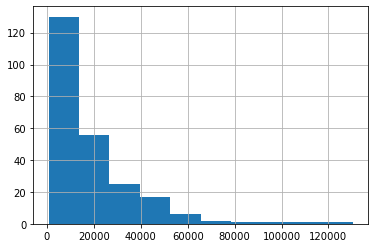

In [127]:
gdp_2014['GDP_Per_Capita'].hist();

13. Find the top 5 counties and bottom 5 countries by GDP per capita in 2014.

In [136]:
gdp_2014.sort_values(by='GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
1014,Central African Republic,2014,672.681648
794,Burundi,2014,768.469837
1375,Dem. Rep. Congo,2014,784.872656
4414,Niger,2014,900.136918
3697,Malawi,2014,1142.530804
...,...,...,...
707,Brunei,2014,76448.593329
5316,Singapore,2014,81965.361071
3610,Luxembourg,2014,92349.186429
5003,Qatar,2014,116693.507701


In [137]:
gdp_2014.nsmallest(5,'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
1014,Central African Republic,2014,672.681648
794,Burundi,2014,768.469837
1375,Dem. Rep. Congo,2014,784.872656
4414,Niger,2014,900.136918
3697,Malawi,2014,1142.530804


14. Now, return to the full dataset, `gdp_df`. Pivot the data for 1990 and 2017 (using the pandas `.pivot_table()` method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2017. Save the result to a dataframe named `gdp_pivoted`.


In [17]:
gdp_pivoted=gdp_df.pivot(index='Country', columns='Year', values='GDP_Per_Capita')

In [18]:
gdp_pivoted

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1502.354073,1671.581238,1626.764793,1772.764974,1807.762344,1795.735834,1766.593077,1757.023490,1758.465636,1734.723214
Albania,4458.247115,3229.250120,3015.391377,3323.864388,3622.007101,4129.975340,4533.894357,4064.132804,4450.922523,5056.566515,...,9525.377979,9927.638204,10207.752347,10369.561032,10492.669028,10700.993216,10970.321401,11352.101422,11796.719185,12316.071501
Algeria,10300.015042,9929.097717,9873.024864,9453.323181,9176.235569,9344.748909,9558.822868,9509.123393,9845.209222,10017.374034,...,12697.690780,12919.491054,13046.128511,13229.008711,13329.770758,13557.769757,13774.758920,13926.910489,13822.389087,13737.356063
Angola,4761.229638,4651.204299,4238.318419,3118.903488,3060.336207,3407.974524,3747.164004,3892.473420,3945.594930,3902.774196,...,6292.534856,6360.441938,6346.395122,6645.085625,6730.945822,6813.052106,6644.857255,6258.376628,6044.972035,5725.327238
Antigua and Barbuda,17454.549799,17598.378401,17497.380127,18055.500956,18851.937822,17645.173769,18407.710553,19000.281878,19486.171892,19816.291441,...,22568.626530,20555.414205,19876.215323,20283.897534,19918.131682,20440.540555,20994.725890,21923.796037,22400.379562,23840.729896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,NaN,NaN,NaN,NaN,3236.196368,3314.761163,3208.119899,3517.569954,3920.320010,4137.843864,...,3816.165070,4019.485067,4405.778573,4568.509070,4559.032259,4445.307470,4493.612080,4600.685400,4651.723645,4576.432497
World,8966.014072,8942.915645,8959.240204,8984.696890,9109.764275,9271.364990,9489.446042,9725.189314,9831.530107,10041.606392,...,12726.100963,13226.953625,13592.336383,13880.359252,14187.709075,14514.392218,14828.598884,15142.226499,15527.280228,15914.172172
Yemen,3425.707169,3466.039074,3561.740073,3519.550101,3581.814359,3628.620445,3660.350262,3729.732721,3839.688064,3873.781695,...,4359.812628,4566.157400,3876.302619,3861.116716,3938.891066,3828.484887,3108.764217,2619.050681,2404.422370,2284.970504


In [19]:
#gdp_pivoted=gdp_pivoted[[1990, 2017]].dropna() #selects only two of the column


#gdp_pivoted.drop(
    
#gdp_pivoted[ 
        #(gdp_pivoted['1990-01-01'].notnull()) & (gdp_pivoted['2017-01-01'].notnull())
    #]#.index
#)

gdp_pivoted[[1990-01-01,2017-01-01]]


15. Create a new column in `gdp_pivoted` named `Percent_Change`. This column should contain the percent change in GDP_Per_Capita from 1990 to 2017. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.


In [20]:
gdp_pivoted=gdp_pivoted.dropna(axis=0, subset=[1990, 2017])

In [21]:
gdp_pivoted

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country,,,,,,,,,,,,,,,,,,,,,
Albania,4458.247115,3229.250120,3015.391377,3323.864388,3622.007101,4129.975340,4533.894357,4064.132804,4450.922523,5056.566515,...,9525.377979,9927.638204,10207.752347,10369.561032,10492.669028,10700.993216,10970.321401,11352.101422,11796.719185,12316.071501
Algeria,10300.015042,9929.097717,9873.024864,9453.323181,9176.235569,9344.748909,9558.822868,9509.123393,9845.209222,10017.374034,...,12697.690780,12919.491054,13046.128511,13229.008711,13329.770758,13557.769757,13774.758920,13926.910489,13822.389087,13737.356063
Angola,4761.229638,4651.204299,4238.318419,3118.903488,3060.336207,3407.974524,3747.164004,3892.473420,3945.594930,3902.774196,...,6292.534856,6360.441938,6346.395122,6645.085625,6730.945822,6813.052106,6644.857255,6258.376628,6044.972035,5725.327238
Antigua and Barbuda,17454.549799,17598.378401,17497.380127,18055.500956,18851.937822,17645.173769,18407.710553,19000.281878,19486.171892,19816.291441,...,22568.626530,20555.414205,19876.215323,20283.897534,19918.131682,20440.540555,20994.725890,21923.796037,22400.379562,23840.729896
Arab World,10491.507721,10243.813560,10573.827918,10618.558714,10657.260745,10613.855460,10851.959106,11067.833926,11466.169109,11483.857782,...,14088.061299,14422.893708,14518.827448,15133.232839,15259.209502,15286.726815,15451.349481,15685.811076,15542.746104,15590.398354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,1457.594613,1512.269780,1609.492026,1705.335543,1822.025810,1962.305534,2112.914861,2253.625263,2353.555715,2437.195887,...,4207.756178,4433.467826,4662.223052,4856.000604,5065.643427,5312.492183,5608.471859,5895.628492,6233.485045,6608.621686
World,8966.014072,8942.915645,8959.240204,8984.696890,9109.764275,9271.364990,9489.446042,9725.189314,9831.530107,10041.606392,...,12726.100963,13226.953625,13592.336383,13880.359252,14187.709075,14514.392218,14828.598884,15142.226499,15527.280228,15914.172172
Yemen,3425.707169,3466.039074,3561.740073,3519.550101,3581.814359,3628.620445,3660.350262,3729.732721,3839.688064,3873.781695,...,4359.812628,4566.157400,3876.302619,3861.116716,3938.891066,3828.484887,3108.764217,2619.050681,2404.422370,2284.970504


In [22]:
gdp_pivoted['Percent_Change']=100*((gdp_pivoted[2017]- gdp_pivoted[1990])/gdp_pivoted[1990])

<ipython-input-22-d48f3aca062f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_pivoted['Percent_Change']=100*((gdp_pivoted[2017]- gdp_pivoted[1990])/gdp_pivoted[1990])


In [23]:
gdp_pivoted.tail()

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Percent_Change
Country,,,,,,,,,,,,,,,,,,,,,
Vietnam,1457.594613,1512.269780,1609.492026,1705.335543,1822.025810,1962.305534,2112.914861,2253.625263,2353.555715,2437.195887,...,4433.467826,4662.223052,4856.000604,5065.643427,5312.492183,5608.471859,5895.628492,6233.485045,6608.621686,327.655604
World,8966.014072,8942.915645,8959.240204,8984.696890,9109.764275,9271.364990,9489.446042,9725.189314,9831.530107,10041.606392,...,13226.953625,13592.336383,13880.359252,14187.709075,14514.392218,14828.598884,15142.226499,15527.280228,15914.172172,73.179298
Yemen,3425.707169,3466.039074,3561.740073,3519.550101,3581.814359,3628.620445,3660.350262,3729.732721,3839.688064,3873.781695,...,4566.157400,3876.302619,3861.116716,3938.891066,3828.484887,3108.764217,2619.050681,2404.422370,2284.970504,-29.812379
Zambia,2339.137959,2278.802025,2185.120656,2278.347123,2031.776457,2038.510332,2108.910953,2130.519957,2064.467651,2102.074889,...,3338.097186,3419.010460,3566.382521,3631.003858,3684.685507,3677.735019,3703.012866,3717.667166,3747.972455,58.933215
Zimbabwe,2819.549467,2906.272849,2591.007534,2572.870395,2768.309953,2736.486436,2985.856605,3036.422224,3099.076182,3054.064189,...,1928.017081,2168.110293,2486.847930,2491.635140,2506.490220,2509.008140,2489.097494,2568.410072,2688.406942,-8.907075



16. How many countries experienced a negative percent change in GDP per capita from 1990 to 2017?

20 counries

In [24]:
pd.value_counts(gdp_pivoted['Percent_Change']<0)

False    189
True      20
Name: Percent_Change, dtype: int64

17. Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2017. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?  
**Bonus:** Put both line charts on the same plot.

20 countries have negative growth.

Equatorial Guinea	 had the highest percapita GDP change


In [25]:
gdp_pivoted.sort_values(by='Percent_Change')

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Percent_Change
Country,,,,,,,,,,,,,,,,,,,,,
Dem. Rep. Congo,1386.933242,1224.289222,1053.895778,877.129534,812.826913,792.465521,762.692295,702.278040,675.116882,631.233874,...,659.795884,682.007332,706.367203,741.173888,784.872656,811.892718,804.522978,807.752905,827.138253,-41.759785
United Arab Emirates,112349.597967,106956.142032,104302.087362,99773.318131,101017.748526,102387.224757,103032.432941,105953.226103,100904.474777,98483.117672,...,55362.989819,56574.288175,57851.693874,60403.045585,62879.703021,65742.650738,67045.104291,66477.818719,66616.050283,-40.829500
Burundi,1027.396660,1054.315509,1042.367169,958.362409,905.890283,821.872598,747.006063,727.681594,754.429748,737.090826,...,733.727723,739.219255,748.075521,760.699070,768.469837,715.549886,689.014892,670.777072,660.330341,-34.710993
Yemen,3425.707169,3466.039074,3561.740073,3519.550101,3581.814359,3628.620445,3660.350262,3729.732721,3839.688064,3873.781695,...,4566.157400,3876.302619,3861.116716,3938.891066,3828.484887,3108.764217,2619.050681,2404.422370,2284.970504,-29.812379
Ukraine,10463.959955,9563.882136,8611.474559,7382.299722,5717.528569,5059.822915,4594.432331,4497.390275,4451.547944,4484.733006,...,7824.498452,8281.867126,8322.173034,8338.915050,8243.473515,7464.939834,7678.053699,7906.540301,NaN,-24.440266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
East Asia & Pacific (IDA & IBRD),2246.661835,2383.625503,2592.162043,2824.797574,3074.842270,3326.964481,3575.360911,3770.233392,3759.818795,3937.999186,...,9003.120287,9676.715890,10321.561918,10973.828935,11618.176984,12276.711343,12955.860868,13686.880719,14448.235227,509.209651
East Asia & Pacific (excluding high income),2222.407152,2357.881139,2564.104057,2794.138239,3041.406513,3290.764226,3536.491963,3729.337215,3719.147142,3895.496275,...,8907.486390,9574.184054,10212.473945,10858.143186,11496.012396,12147.948865,12820.367497,13544.178535,14297.925500,509.437318
Myanmar,730.228038,715.865296,775.554961,813.030659,863.890169,913.008761,959.793711,1001.087335,1046.243846,1146.433298,...,3688.491636,3864.959768,4114.227664,4423.146388,4737.459861,5030.264149,5288.570199,5610.324700,5922.023358,668.297629


Country
China                AxesSubplot(0.125,0.125;0.775x0.755)
Equatorial Guinea    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

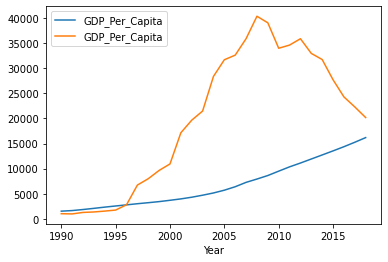

In [26]:
highGDP=gdp_df[gdp_df['Country'].isin(['China', 'Equatorial Guinea'])]

fig, ax = plt.subplots()

highGDP.groupby('Country').plot(x='Year', y='GDP_Per_Capita', ax=ax, legend=True)


18. Read in continents.csv contained in the `data` folder into a new dataframe called `continents`. We will be using this dataframe to add a new column to our dataset.

In [142]:
continents=pd.read_csv('../data/continents.csv')
continents.head()

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola


19. Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

In [143]:
gdp_df=gdp_df.merge(continents, on='Country')

20. Determine the number of countries per continent. Create a bar chart showing this.

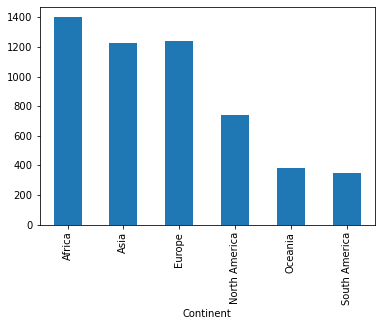

In [144]:
gdp_df.groupby('Continent')['Country'].count().plot(kind='bar');

21. Creat a seaborn boxplot showing GDP per capita in 2014 split out by continent. What do you notice?

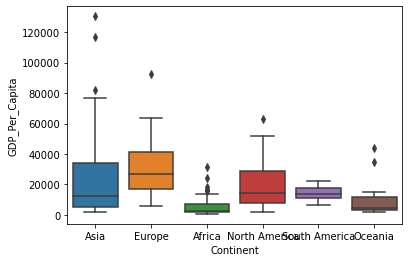

In [145]:
sns.boxplot(data=gdp_df[gdp_df['Year']==2014], x='Continent', y='GDP_Per_Capita');

22. Read in internet_use.csv into a DataFrame called `internet_df`. You will most likely get an error message when doing this - figure out what is going wrong and fix it. Take a look at the first and last five rows and make any corrections to your `read_csv()` call to fix this. Again, **do not** modify the original datasets.

In [32]:
internet_df=pd.read_csv("../data/internet_use.csv", skipfooter=182 )


<ipython-input-32-736e8999d06b>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  internet_df=pd.read_csv("../data/internet_use.csv", skipfooter=182 )


In [33]:
internet_df.tail()

,Country or Area,Year,Value,Value Footnotes,Unnamed: 4,Unnamed: 5
4490,Zimbabwe,1997,0.033080,NaN,NaN,NaN
4491,Zimbabwe,1996,0.016790,NaN,NaN,NaN
4492,Zimbabwe,1995,0.007684,NaN,NaN,NaN
4493,Zimbabwe,1994,0.001739,NaN,NaN,NaN
4494,Zimbabwe,1990,0.000000,NaN,NaN,NaN


23. Drop the Value Footnotes column and then rename the columns to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

In [34]:
internet_df.drop(['Value Footnotes', 'Unnamed: 4', 'Unnamed: 5'], axis=1, inplace=True)


In [35]:
internet_df.rename(columns={"Country or Area":"Country", "Value":"Internet_Users_Pct"}, inplace=True)

In [36]:
internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


24. How many rows and columns does this new dataset have? What are the types of its columns? Ensure that the `Internet_Users_Pct` column is a numeric data type and fix it if it is not.

In [37]:
internet_df.shape
internet_df.info()
internet_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             4495 non-null   object 
 1   Year                4495 non-null   int64  
 2   Internet_Users_Pct  4495 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 105.5+ KB


,Year,Internet_Users_Pct
count,4495.000000,4495.000000
mean,2002.732814,18.675495
std,7.856270,25.091999
min,1960.000000,0.000000
25%,1998.000000,0.346593
50%,2003.000000,5.265683
75%,2009.000000,30.581020
max,2014.000000,98.160000


In [38]:
internet_df.tail()

,Country,Year,Internet_Users_Pct
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739
4494,Zimbabwe,1990,0.000000



25. What is the first year that has a nonzero internet users percentage reported? What is the general trend in internet users percentage over the years. Pick a visualization that you think illustrates this trend well.

first non zero year is 1990

In [39]:
internet_df[internet_df['Internet_Users_Pct']>0].nsmallest(1, "Year")

,Country,Year,Internet_Users_Pct
204,Australia,1990,0.585095


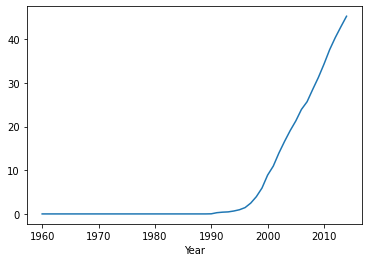

In [40]:
internet_df.groupby('Year')['Internet_Users_Pct'].mean().plot()

26. Merge `gdf_df` and `internet_df` (on Country and Year) into a single DataFrame named `gdp_and_internet_use`. Keep only countries and years that appear in both tables.  
**Difficult Bonus:** Do not attempt this part until you have completed all other portions of the data question. Some countries have slightly different names in the internet use and gdp dataframes. For example, the Central African Republic is "Central African Republic" in the gdp dataframe and "Central African Rep." in the internet use dataframe. Find as many instances like this as you can and resolve them so that when merging you keep the maximum number of countries possible.

In [148]:
gdp_and_internet_use=gdp_df.merge(internet_df, on=('Country', 'Year')) 

27.	Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.

In [146]:
gdp_and_internet_use.head(5)

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
0,Afghanistan,2014,1795.735834,Asia,6.390000
1,Afghanistan,2013,1807.762344,Asia,5.900000
2,Afghanistan,2012,1772.764974,Asia,5.454545
3,Afghanistan,2011,1626.764793,Asia,5.000000
4,Afghanistan,2010,1671.581238,Asia,4.000000


In [42]:
gdp_and_internet_use.tail()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
3514,Zimbabwe,1997,3036.422224,Africa,0.033080
3515,Zimbabwe,1996,2985.856605,Africa,0.016790
3516,Zimbabwe,1995,2736.486436,Africa,0.007684
3517,Zimbabwe,1994,2768.309953,Africa,0.001739
3518,Zimbabwe,1990,2819.549467,Africa,0.000000


28. Create a new DataFrame, named `gdp_and_internet_use_2014` by extracting data for the year 2014 from `gdp_and_internet_use`. What is the mean internet users percentage in 2014? How many countries have at least 90% internet users in 2014?

In [43]:
gdp_and_internet_use_2014=gdp_and_internet_use[gdp_and_internet_use['Year']==2014]
gdp_and_internet_use_2014.head()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
0,Afghanistan,2014,1795.735834,Asia,6.39
13,Albania,2014,10700.993216,Europe,60.10
34,Algeria,2014,13557.769757,Africa,18.09
56,Angola,2014,6813.052106,Africa,21.26
76,Antigua and Barbuda,2014,20440.540555,North America,64.00


29. Find the countries that had the top 3 largest GDP per capita figures for 2014. Create a seaborn FacetGrid showing the change in internet user percentage over time for these five countries. Each individual figure in the facet grid will represent a single country.  What trends do you notice?

In [44]:
gdp_and_internet_use_2014['Internet_Users_Pct'].mean()

44.673536463414635

In [45]:
gdp_and_internet_use_2014[
    gdp_and_internet_use_2014['Internet_Users_Pct']>=90].count()

Country               12
Year                  12
GDP_Per_Capita        12
Continent             12
Internet_Users_Pct    12
dtype: int64

In [46]:
gdp_and_internet_use_2014.nlargest(3, 'GDP_Per_Capita')


,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
2556,Qatar,2014,116693.507701,Asia,91.49
1812,Luxembourg,2014,92349.186429,Europe,94.67
2765,Singapore,2014,81965.361071,Asia,82.00


In [47]:


GdpBest3=gdp_and_internet_use[
    (gdp_and_internet_use['Country']=="Qatar")| 
    (gdp_and_internet_use['Country']=="Luxembourg")|
    (gdp_and_internet_use['Country']=="Singapore")]

In [48]:
GdpBest3

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
1812,Luxembourg,2014,92349.186429,Europe,94.670000
1813,Luxembourg,2013,90656.380431,Europe,93.776500
1814,Luxembourg,2012,89505.159080,Europe,91.949924
1815,Luxembourg,2011,92005.016836,Europe,90.029859
1816,Luxembourg,2010,91743.293852,Europe,90.620000
...,...,...,...,...,...
2785,Singapore,1994,43835.783293,Asia,1.185204
2786,Singapore,1993,40714.217145,Asia,0.763278
2787,Singapore,1992,37463.009189,Asia,0.471368
2788,Singapore,1991,36201.887548,Asia,0.161504


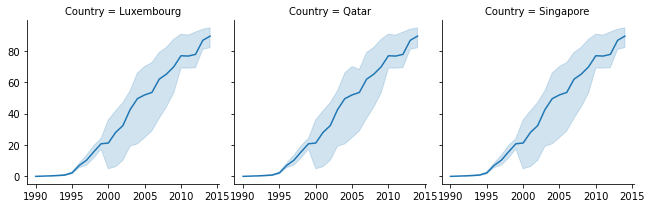

In [49]:
g=sns.FacetGrid(GdpBest3, col='Country') 
g.map(sns.lineplot, x='Year', y='Internet_Users_Pct', data=GdpBest3)


30. Create a scatter plot of Internet Use vs GDP per Capita for the year 2014. What do you notice?



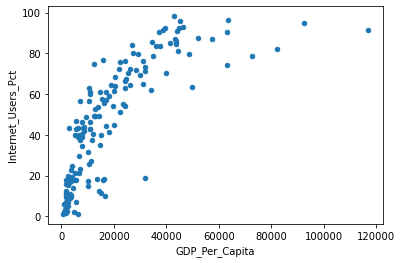

In [150]:
gdp_and_internet_use_2014.plot(kind='scatter', x='GDP_Per_Capita', y='Internet_Users_Pct');

31. Find the correlation between GDP per Capita and Internet Use for the year 2014. What is the meaning of this number?



In [51]:
gdp_and_internet_use_2014['GDP_Per_Capita'].corr(gdp_and_internet_use_2014['Internet_Users_Pct'])

0.7879885707262836

32. Add a column to `gdp_and_internet_use_2014` and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and internet users percentage. How does this compare to the calculation in the previous part?

In [52]:
gdp_and_internet_use_2014['log_GDP_per_capita']=np.log(gdp_and_internet_use_2014['GDP_Per_Capita'])


<ipython-input-52-15a19ec6725f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_and_internet_use_2014['log_GDP_per_capita']=np.log(gdp_and_internet_use_2014['GDP_Per_Capita'])


33. Filter the original dataset down to just the United States for all available years. Calculate correlation between internet use and gdp per capita. Is this meaningful or useful?

This is totally expected result as both internet use and percapita income increased over past decades. 

In [53]:
gdp_and_internet_use_2014['log_GDP_per_capita'].corr(gdp_and_internet_use_2014['Internet_Users_Pct'])

0.8844322971419831

In [54]:
US_GDP_perCap_InternetUse=gdp_and_internet_use[gdp_and_internet_use['Country']=="United States"]

In [55]:
US_GDP_perCap_InternetUse

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
3343,United States,2014,52080.792568,North America,87.360000
3344,United States,2013,51208.892428,North America,84.200000
3345,United States,2012,50632.443448,North America,79.300000
3346,United States,2011,49883.113984,North America,69.729461
3347,United States,2010,49479.248679,North America,71.690000
3348,United States,2009,48644.151110,North America,71.000000
3349,United States,2008,50349.715322,North America,74.000000
3350,United States,2007,50897.731238,North America,75.000000
3351,United States,2006,50437.806235,North America,68.931193
3352,United States,2005,49512.926789,North America,67.968053


In [56]:
US_GDP_perCap_InternetUse['GDP_Per_Capita'].corr(US_GDP_perCap_InternetUse['Internet_Users_Pct'])

0.9916180229625119

# Solo Exploration and Presentation:

1. Choose and download another data set from the UN data http://data.un.org/Explorer.aspx to merge with your data and explore. Prepare a short (< 5 minute) presentation of your findings. Report any interesting correlations you find. Include visualizations and consider adding interactivity with ipywidgets. This presentation can be done either in a Jupyter Notebook or using another presentation software, such as PowerPoint. (Check out Jupyter Slides if you have time. This allows you to turn your jupyter notebook into a slideshow.


In [58]:
IMF_credit_df=pd.read_csv("../data/IMF_credit.csv", skipfooter=0 )

In [59]:
IMF_credit_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,274596496.6,NaN
1,Afghanistan,2017,284853905.2,NaN
2,Afghanistan,2016,276984408.9,NaN
3,Afghanistan,2015,300161589.6,NaN
4,Afghanistan,2014,334840274.3,NaN


In [63]:
IMF_credit_df.drop("Value Footnotes", axis=1, inplace=True)

In [67]:
IMF_credit_df.rename(columns={'Country or Area':'Country','Value':'Credit'}, inplace=True)
IMF_credit_df.head()

,Country,Year,Credit
0,Afghanistan,2018,274596496.6
1,Afghanistan,2017,284853905.2
2,Afghanistan,2016,276984408.9
3,Afghanistan,2015,300161589.6
4,Afghanistan,2014,334840274.3


2.If time allows, check out the plotly library to add additional interativity to your plots. https://plotly.com/python/plotly-express/).

In [68]:
gdp_percapita_IMFcredit=gdp_df.merge(IMF_credit_df, on=('Country','Year'))

In [74]:
gdp_percapita_IMFcredit.tail()

,Country,Year,GDP_Per_Capita,Continent,Credit
3324,Zimbabwe,1994,2768.309953,Africa,375911363.1
3325,Zimbabwe,1993,2572.870395,Africa,281579790.1
3326,Zimbabwe,1992,2591.007534,Africa,216150000.0
3327,Zimbabwe,1991,2906.272849,Africa,0.0
3328,Zimbabwe,1990,2819.549467,Africa,6891365.0


In [100]:
gdp_percapita_IMFcredit[gdp_percapita_IMFcredit['Year']==1990].nlargest(5,'Credit')

,Country,Year,GDP_Per_Capita,Continent,Credit,credit_mill,credit_bill,credit_thous
1947,Mexico,1990,13579.611371,North America,6.551270e+09,6551.269631,6.551270,6551269.631
132,Argentina,1990,11372.823108,South America,3.083196e+09,3083.195865,3.083196,3083195.865
3212,Venezuela,1990,14619.454190,South America,3.011736e+09,3011.735654,3.011736,3011735.654
1422,India,1990,1905.721365,Asia,2.771330e+09,2771.330299,2.771330,2771330.299
447,Brazil,1990,10341.656209,South America,1.820550e+09,1820.549549,1.820550,1820549.549


In [94]:
gdp_percapita_IMFcredit['credit_mill']=gdp_percapita_IMFcredit['Credit']/1000000

In [112]:

big3IMFreditors1990=gdp_percapita_IMFcredit[
    (gdp_percapita_IMFcredit['Country']=="Mexico")| 
    (gdp_percapita_IMFcredit['Country']=="Argentina")|
    (gdp_percapita_IMFcredit['Country']=="Venezuela")]

In [113]:
big3IMFreditors1990.head(10)

,Country,Year,GDP_Per_Capita,Continent,Credit,credit_mill,credit_bill,credit_thous
104,Argentina,2018,18288.244599,South America,3.092251e+10,30922.512048,30.922512,3.092251e+07
105,Argentina,2017,18945.144022,South America,2.876808e+09,2876.808116,2.876808,2.876808e+06
106,Argentina,2016,18645.091851,South America,2.715600e+09,2715.600373,2.715600,2.715600e+06
107,Argentina,2015,19243.579469,South America,2.799230e+09,2799.230029,2.799230,2.799230e+06
108,Argentina,2014,18935.002497,South America,2.926654e+09,2926.654152,2.926654,2.926654e+06
109,Argentina,2013,19637.755383,South America,3.110862e+09,3110.861538,3.110862,3.110862e+06
110,Argentina,2012,19392.309793,South America,3.104640e+09,3104.639815,3.104640,3.104640e+06
111,Argentina,2011,19817.450477,South America,3.101307e+09,3101.306749,3.101307,3.101307e+06
112,Argentina,2010,18911.823188,South America,3.110922e+09,3110.922140,3.110922,3.110922e+06
113,Argentina,2009,17302.654149,South America,3.166796e+09,3166.796445,3.166796,3.166796e+06


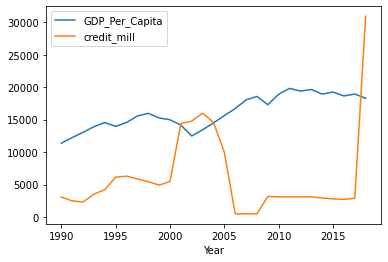

In [114]:
gdp_percapita_IMFcredit[gdp_percapita_IMFcredit['Country']=='Argentina'].plot(x='Year', y=['GDP_Per_Capita','credit_mill'])

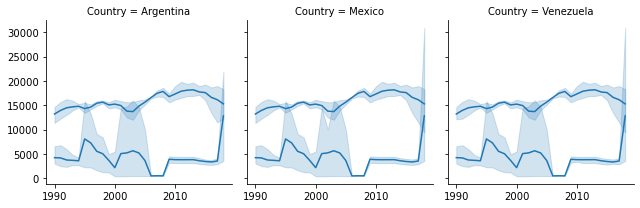

In [116]:
g=sns.FacetGrid(big3IMFreditors1990, col='Country') 
g.map(sns.lineplot, x='Year', y='GDP_Per_Capita', data=big3IMFreditors1990)
g.map(sns.lineplot, x='Year', y='credit_mill', data=big3IMFreditors1990)

2.    If time allows, check out the plotly library to add additional interativity to your plots. [https://plotly.com/python/plotly-express/)](https://plotly.com/python/plotly-express/).